In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/Usuario/Downloads/Telco-Customer-Churn-V2.csv")

print(data.head())


   gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No     1.0           No   
1    Male            No      No         No    34.0          Yes   
2    Male            No      No         No     2.0          Yes   
3    Male            No      No         No    45.0           No   
4  Female            No      No         No     2.0          Yes   

        MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  'No phone service'             DSL             No          Yes   
1                  No             DSL            Yes           No   
2                  No             DSL            Yes          Yes   
3  'No phone service'             DSL            Yes           No   
4                  No   'Fiber optic'             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes        

In [62]:
print(data.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [63]:

print(f"Número de columnas: {data.shape[1]}")

print(f"Número de cuentas: {data.shape[0]}")


Número de columnas: 20
Número de cuentas: 7043


In [64]:
data.info

<bound method DataFrame.info of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No     1.0           No   
1       Male            No      No         No    34.0          Yes   
2       Male            No      No         No     2.0          Yes   
3       Male            No      No         No    45.0           No   
4     Female            No      No         No     2.0          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes    24.0          Yes   
7039  Female            No     Yes        Yes    72.0          Yes   
7040  Female            No     Yes        Yes    11.0           No   
7041    Male           Yes     Yes         No     4.0          Yes   
7042    Male            No      No         No    66.0          Yes   

           MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     'No phone service'             DSL             No

In [65]:
print(data.dtypes)


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


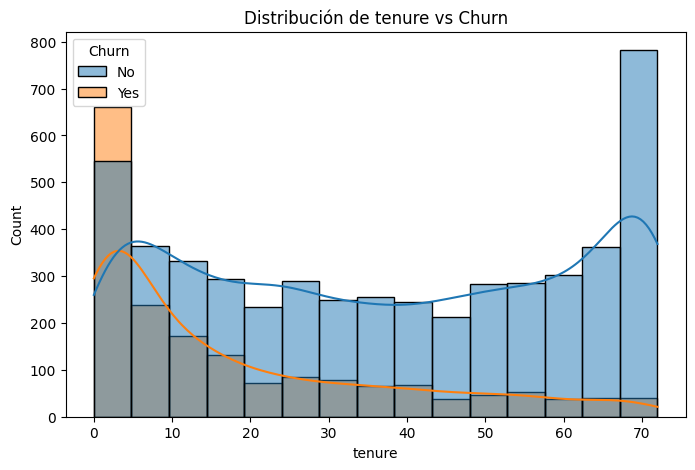

In [66]:
# Histograma de tenure vs churn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='Churn', kde=True)
plt.title('Distribución de tenure vs Churn')
plt.show()


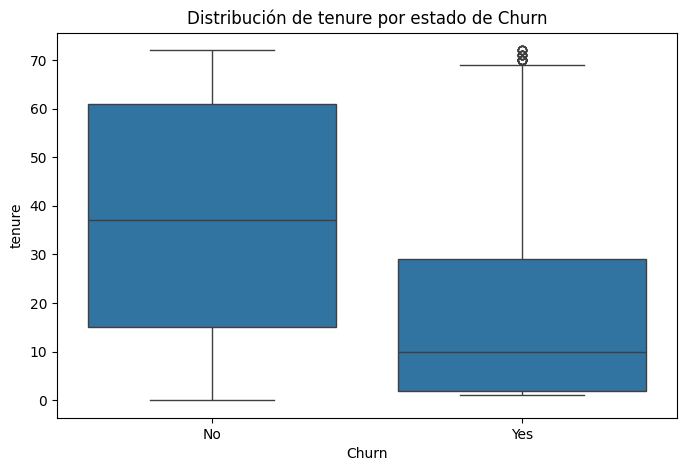

In [67]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Boxplot de tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Distribución de tenure por estado de Churn')
plt.show()

In [68]:
# Calculamos el porcentaje que equivalen los datos faltantes
missing_percentage = data.isnull().mean() * 100
# Eliminamos las columnas que tengan más del 30 porciento de datos faltantes
columns_to_drop = missing_percentage[missing_percentage > 30].index.tolist()
data = data.drop(columns=columns_to_drop)


tasa de abandono por categoria de servicio
permiten identificar qué variables podrían estar relacionadas con la tasa de abandono.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_32872\4194814804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].fillna('No', inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_32872\4194814804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

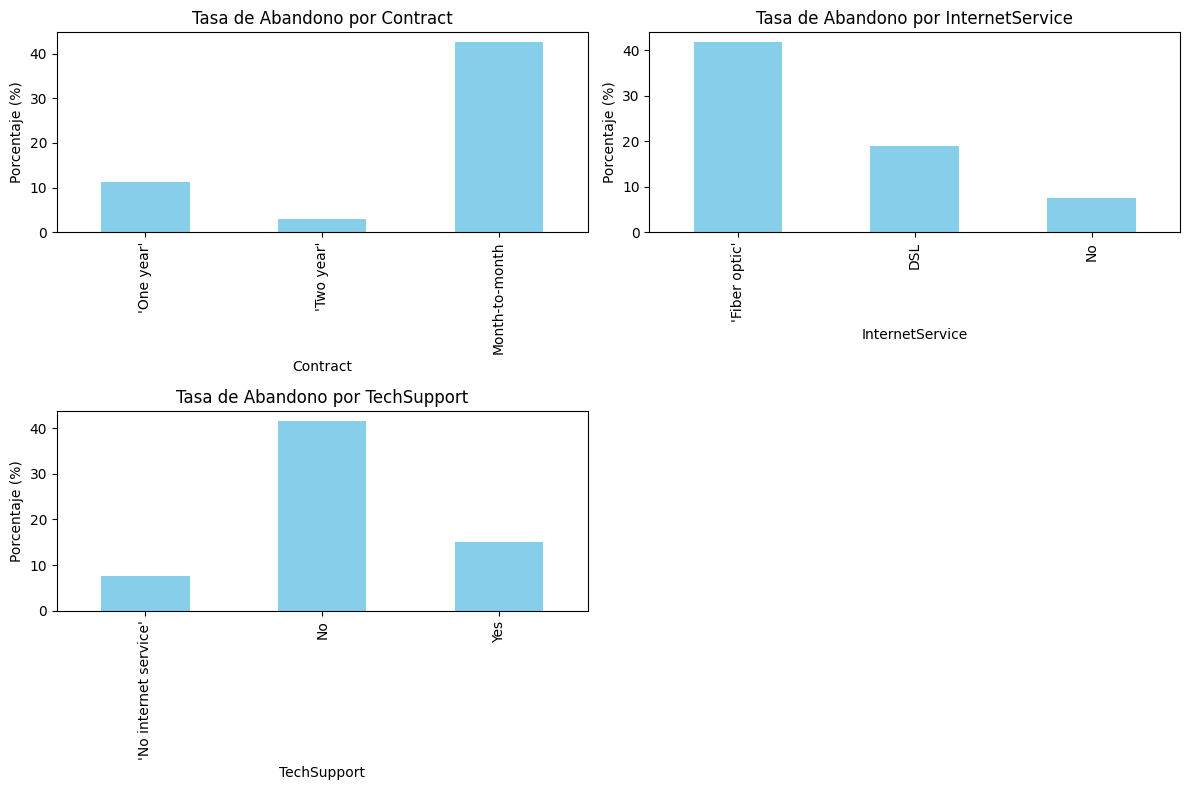

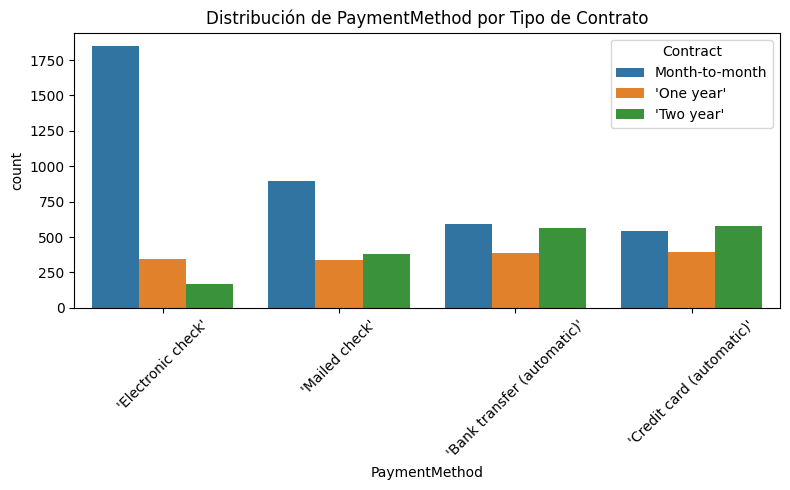

In [69]:
data['Churn'].fillna('No', inplace=True) 
data['tenure'].fillna(0, inplace=True)     

important_cols = ['Contract', 'InternetService', 'TechSupport']

plt.figure(figsize=(12, 8))

for i, col in enumerate(important_cols, 1):
    plt.subplot(2, 2, i)
    
    churn_rate = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
    churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f"Tasa de Abandono por {col}")
    plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='PaymentMethod', hue='Contract')
plt.title("Distribución de PaymentMethod por Tipo de Contrato")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


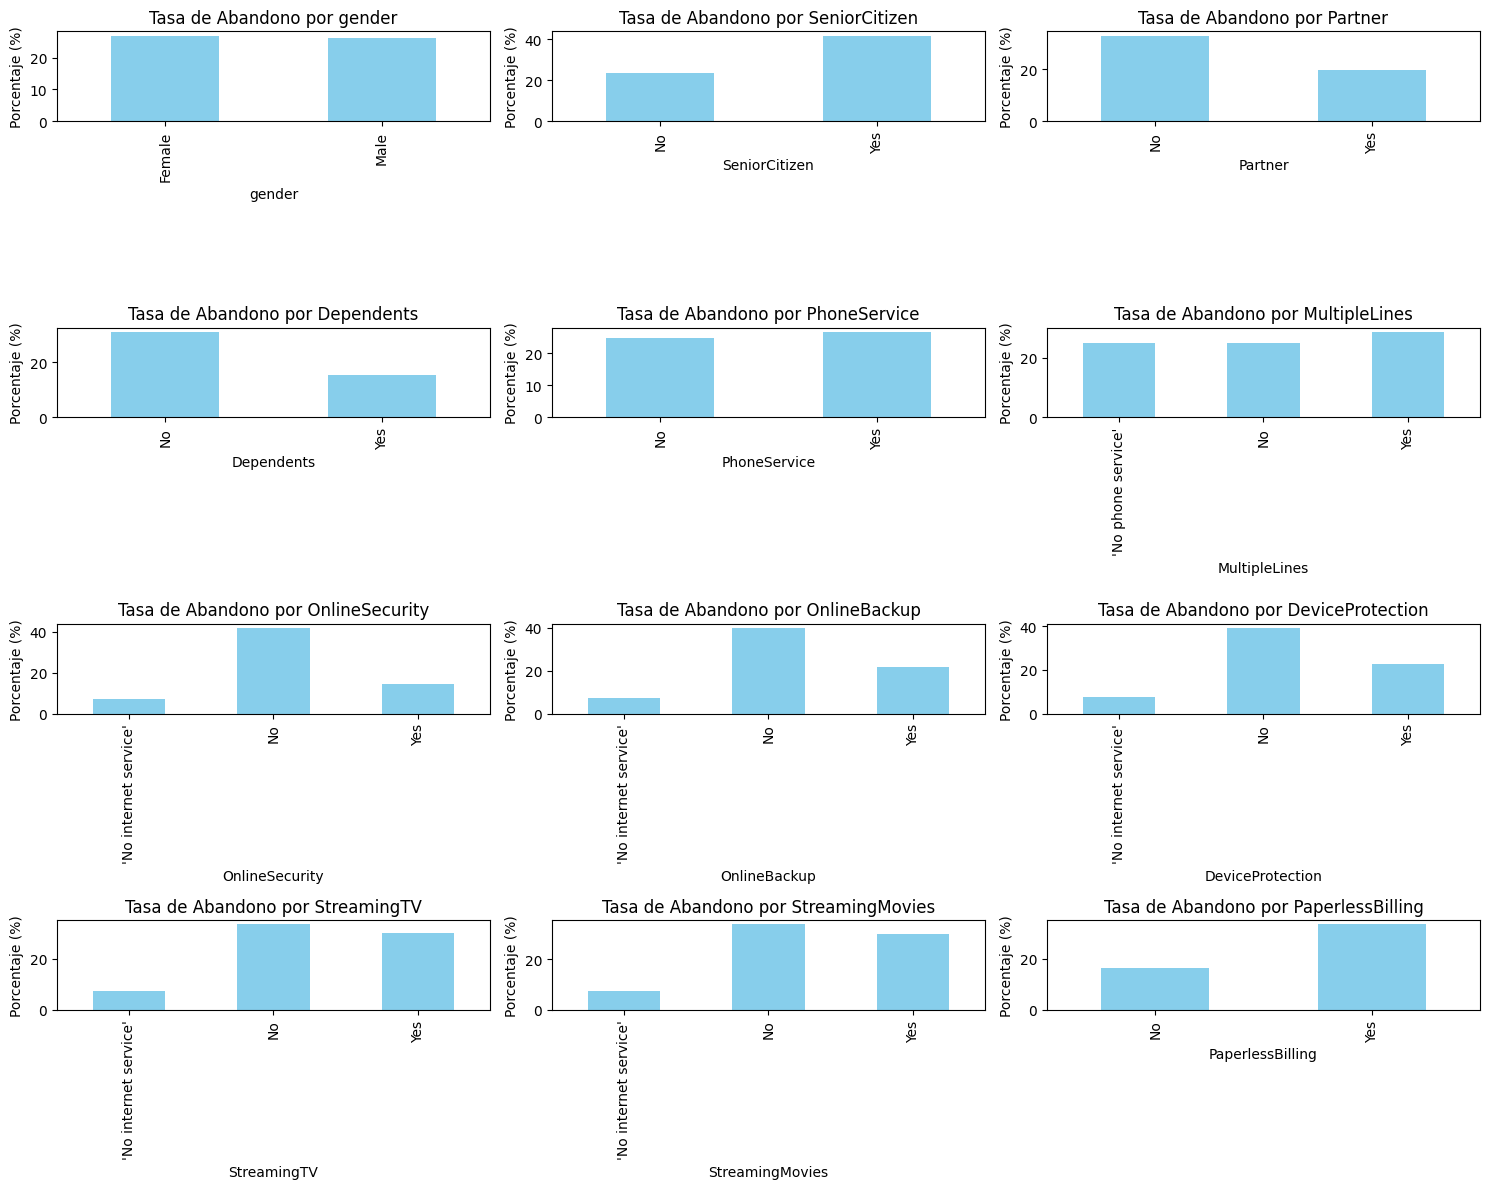

In [70]:


additional_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling']

plt.figure(figsize=(15, 12))

for i, col in enumerate(additional_cols, 1):
    plt.subplot(4, 3, i)
    churn_rate = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes', 0) * 100
    churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f"Tasa de Abandono por {col}")
    plt.ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()


Preprocesamiento de datos 


In [71]:
print(data.isnull().sum())


gender                0
SeniorCitizen         0
Partner               0
Dependents           84
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      162
OnlineBackup        167
DeviceProtection      0
TechSupport         162
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      188
TotalCharges        377
Churn                 0
dtype: int64


In [72]:

missing_percent = ((data.isnull().sum() / len(data)) * 100)
print(missing_percent)


gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          1.192674
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      2.300156
OnlineBackup        2.371149
DeviceProtection    0.000000
TechSupport         2.300156
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      2.669317
TotalCharges        5.352833
Churn               0.000000
dtype: float64


In [73]:

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

cols_fill_no = ['OnlineSecurity', 'OnlineBackup', 'TechSupport']
for col in cols_fill_no:
    data[col].fillna('No', inplace=True)

data['MonthlyCharges'].fillna(data['MonthlyCharges'].median(), inplace=True)

# Verificar que no haya nulos restantes
print(data.isnull().sum())


gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        377
Churn                 0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_32872\1199290338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_32872\1199290338.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be